In [4]:
# Importing libraries for data manipulation
import pandas as pd
import pandas_datareader as pdr
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing libraries for datetime
from datetime import datetime

# Impoerting library for data
import yfinance as yf

In [1]:
from google.colab import files
upload = files.upload()

Saving Train_SU63ISt.csv to Train_SU63ISt.csv


In [2]:
from google.colab import files
upload = files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv


In [6]:
df_train = pd.read_csv('Train_SU63ISt.csv')
df_test = pd.read_csv('Test_0qrQsBZ.csv')

In [7]:
df_train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [8]:
df_test.columns

Index(['ID', 'Datetime'], dtype='object')

In [9]:
df_train.shape

(18288, 3)

In [10]:
df_test.shape

(5112, 2)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [13]:
df_train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [16]:
df_train['Datetime'] = pd.to_datetime(df_train['Datetime'], format='%d-%m-%Y %H:%M')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [17]:
df_test['Datetime'] = pd.to_datetime(df_test['Datetime'], format='%d-%m-%Y %H:%M')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        5112 non-null   int64         
 1   Datetime  5112 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


In [19]:
df_train['Datetime'].dt.year

,Datetime
0,2012
1,2012
2,2012
3,2012
4,2012
...,...
18283,2014
18284,2014
18285,2014
18286,2014


In [20]:
df_train.Datetime.dt.month

,Datetime
0,8
1,8
2,8
3,8
4,8
...,...
18283,9
18284,9
18285,9
18286,9


In [21]:
df_train['Datetime'].dt.day

,Datetime
0,25
1,25
2,25
3,25
4,25
...,...
18283,25
18284,25
18285,25
18286,25


In [22]:
df_train['Datetime'].dt.day.value_counts()

,count
Datetime,
25,624
26,600
27,600
28,600
3,600
2,600
1,600
5,600
6,600


In [23]:
df_train.Datetime.dt.hour

,Datetime
0,0
1,1
2,2
3,3
4,4
...,...
18283,19
18284,20
18285,21
18286,22


In [25]:
df_train['Datetime'].dt.dayofweek

,Datetime
0,5
1,5
2,5
3,5
4,5
...,...
18283,3
18284,3
18285,3
18286,3


In [26]:
df_train['Dayofweek'] = df_train.Datetime.dt.dayofweek
df_train.head()

,ID,Datetime,Count,Dayofweek
0,0,2012-08-25 00:00:00,8,5
1,1,2012-08-25 01:00:00,2,5
2,2,2012-08-25 02:00:00,6,5
3,3,2012-08-25 03:00:00,2,5
4,4,2012-08-25 04:00:00,2,5


In [28]:
df_train['Weekend'] = [1 if i in [5,6] else 0 for i in df_train['Dayofweek']]
df_train.head()

,ID,Datetime,Count,Dayofweek,Weekend
0,0,2012-08-25 00:00:00,8,5,1
1,1,2012-08-25 01:00:00,2,5,1
2,2,2012-08-25 02:00:00,6,5,1
3,3,2012-08-25 03:00:00,2,5,1
4,4,2012-08-25 04:00:00,2,5,1


In [37]:
df_train.index

RangeIndex(start=0, stop=18288, step=1)

In [38]:
df_train.set_index('Datetime', inplace=True)
df_train.head()

,ID,Count,Dayofweek,Weekend
Datetime,,,,
2012-08-25 00:00:00,0,8,5,1
2012-08-25 01:00:00,1,2,5,1
2012-08-25 02:00:00,2,6,5,1
2012-08-25 03:00:00,3,2,5,1
2012-08-25 04:00:00,4,2,5,1


In [39]:
df_test.set_index('Datetime', inplace=True)
df_test.head()

,ID
Datetime,
2014-09-26 00:00:00,18288
2014-09-26 01:00:00,18289
2014-09-26 02:00:00,18290
2014-09-26 03:00:00,18291
2014-09-26 04:00:00,18292


In [41]:
df_train.drop('ID', axis=1, inplace=True)
df_train.head()

,Count,Dayofweek,Weekend
Datetime,,,
2012-08-25 00:00:00,8,5,1
2012-08-25 01:00:00,2,5,1
2012-08-25 02:00:00,6,5,1
2012-08-25 03:00:00,2,5,1
2012-08-25 04:00:00,2,5,1


<Axes: xlabel='Datetime'>

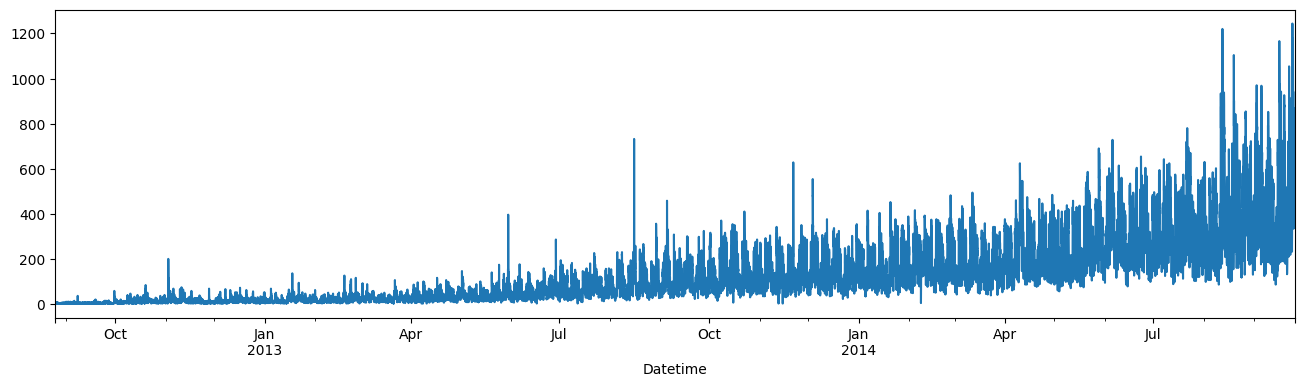

In [43]:
df_train['Count'].plot(figsize=(16,4))

In [45]:
df_train['Year'] = df_train.index.year
df_train

,Count,Dayofweek,Weekend,Year
Datetime,,,,
2012-08-25 00:00:00,8,5,1,2012
2012-08-25 01:00:00,2,5,1,2012
2012-08-25 02:00:00,6,5,1,2012
2012-08-25 03:00:00,2,5,1,2012
2012-08-25 04:00:00,2,5,1,2012
...,...,...,...,...
2014-09-25 19:00:00,868,3,0,2014
2014-09-25 20:00:00,732,3,0,2014
2014-09-25 21:00:00,702,3,0,2014


<Axes: xlabel='Year'>

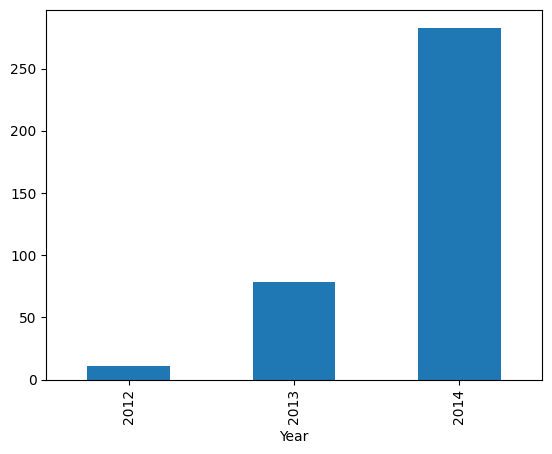

In [49]:
df_train.groupby('Year')['Count'].mean().plot(kind='bar')

In [50]:
df_train['Month'] = df_train.index.month
df_train.head()

,Count,Dayofweek,Weekend,Year,Month
Datetime,,,,,
2012-08-25 00:00:00,8,5,1,2012,8
2012-08-25 01:00:00,2,5,1,2012,8
2012-08-25 02:00:00,6,5,1,2012,8
2012-08-25 03:00:00,2,5,1,2012,8
2012-08-25 04:00:00,2,5,1,2012,8


<Axes: xlabel='Month'>

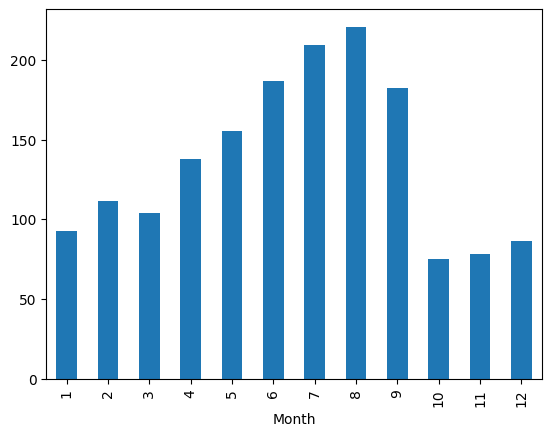

In [51]:
df_train.groupby('Month')['Count'].mean().plot(kind='bar')

<Axes: xlabel='Year'>

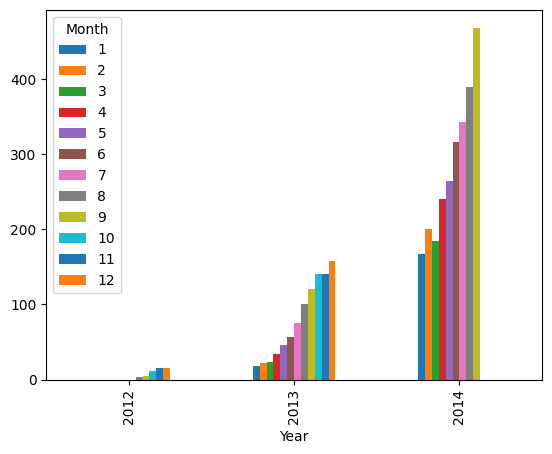

In [52]:
df_train.groupby(['Year', 'Month'])['Count'].mean().unstack().plot(kind='bar')

<Axes: xlabel='Year,Month'>

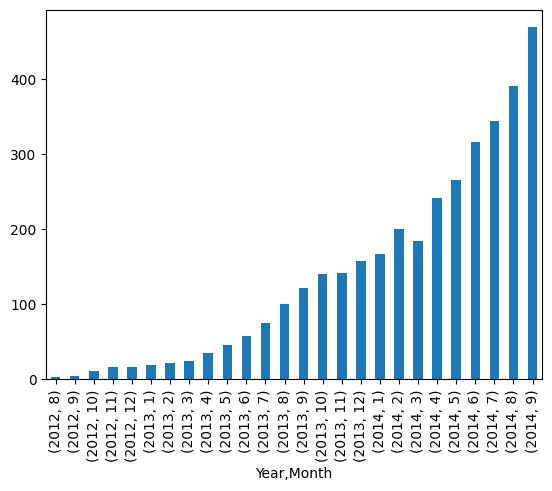

In [54]:
df_train.groupby(['Year', 'Month'])['Count'].mean().plot(kind='bar')

In [55]:
df_train['Day'] = df_train.index.day
df_train.head()

,Count,Dayofweek,Weekend,Year,Month,Day
Datetime,,,,,,
2012-08-25 00:00:00,8,5,1,2012,8,25
2012-08-25 01:00:00,2,5,1,2012,8,25
2012-08-25 02:00:00,6,5,1,2012,8,25
2012-08-25 03:00:00,2,5,1,2012,8,25
2012-08-25 04:00:00,2,5,1,2012,8,25


<Axes: xlabel='Day'>

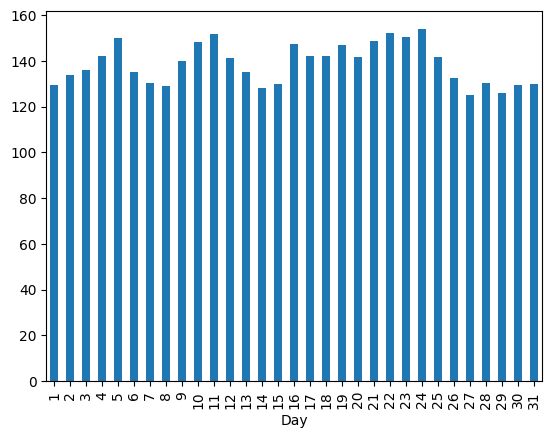

In [56]:
df_train.groupby('Day')['Count'].mean().plot(kind='bar')

In [57]:
df_train['Hour'] = df_train.index.hour
df_train.head()

,Count,Dayofweek,Weekend,Year,Month,Day,Hour
Datetime,,,,,,,
2012-08-25 00:00:00,8,5,1,2012,8,25,0
2012-08-25 01:00:00,2,5,1,2012,8,25,1
2012-08-25 02:00:00,6,5,1,2012,8,25,2
2012-08-25 03:00:00,2,5,1,2012,8,25,3
2012-08-25 04:00:00,2,5,1,2012,8,25,4


<Axes: xlabel='Hour'>

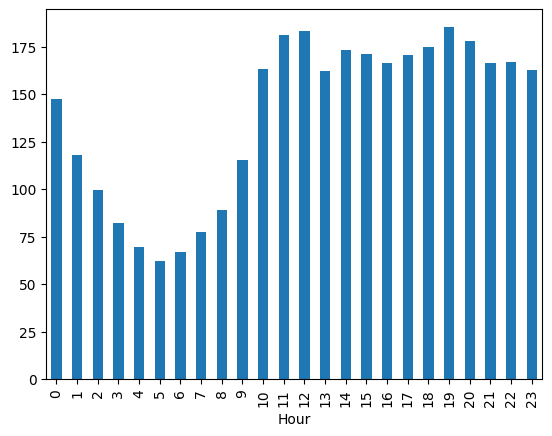

In [58]:
df_train.groupby('Hour')['Count'].mean().plot(kind='bar')

<Axes: xlabel='Weekend'>

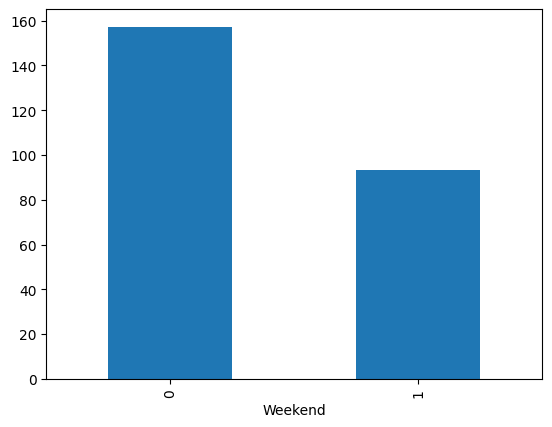

In [59]:
df_train.groupby('Weekend')['Count'].mean().plot(kind='bar')

<Axes: xlabel='Dayofweek'>

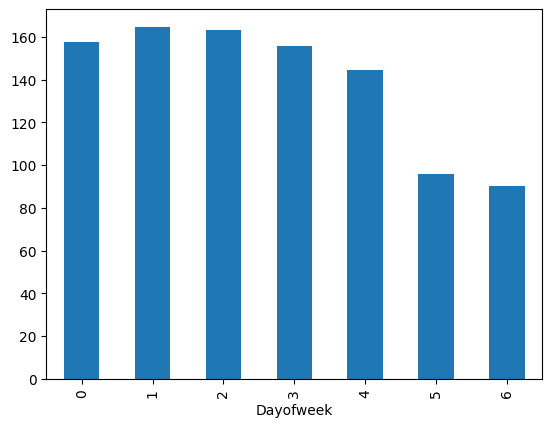

In [61]:
df_train.groupby(['Dayofweek'])['Count'].mean().plot(kind='bar')

In [62]:
hourly = df_train.resample('H').mean()
daily = df_train.resample('D').mean()
weekly = df_train.resample('W').mean()
monthly = df_train.resample('M').mean()

<ipython-input-62-f6b1950e8366>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df_train.resample('H').mean()
<ipython-input-62-f6b1950e8366>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_train.resample('M').mean()


<Axes: title={'center': 'Monthly'}, xlabel='Datetime'>

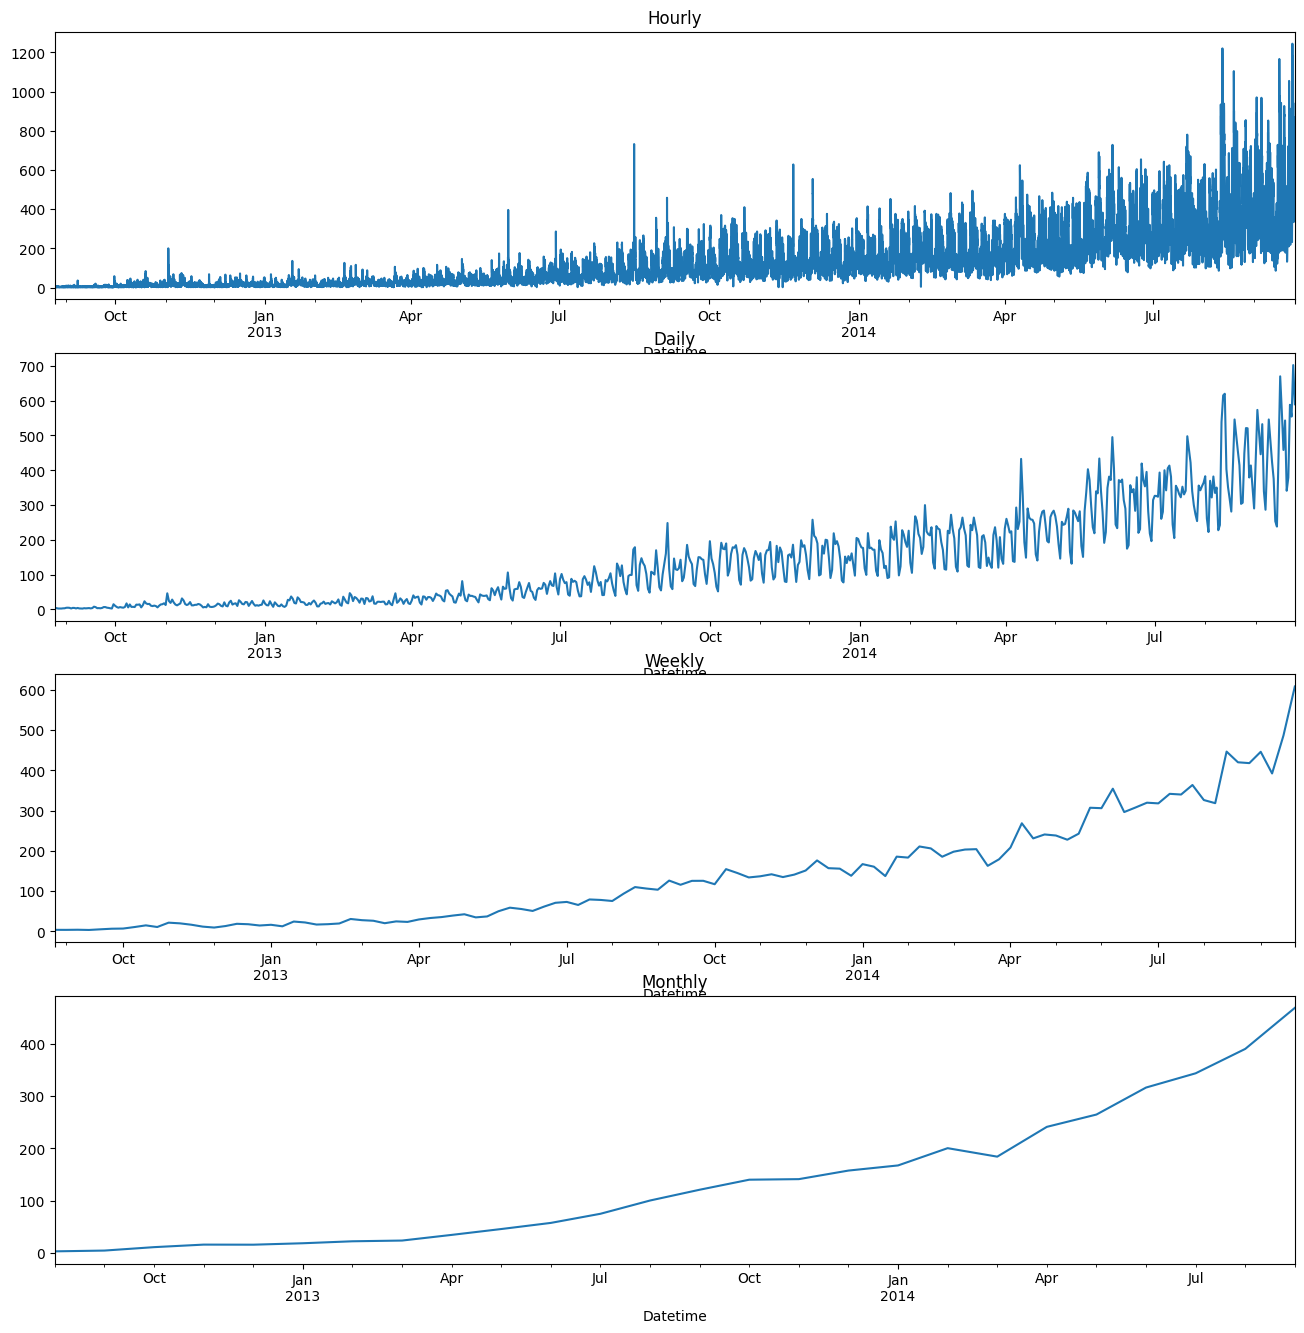

In [64]:
fig, axs = plt.subplots(4, 1, figsize=(16,16))
hourly['Count'].plot(title='Hourly', ax=axs[0])
daily['Count'].plot(title='Daily', ax=axs[1])
weekly['Count'].plot(title='Weekly', ax=axs[2])
monthly['Count'].plot(title='Monthly', ax=axs[3])

In [65]:
new_df_train = df_train.resample('D').mean()
new_df_train.head()

,Count,Dayofweek,Weekend,Year,Month,Day,Hour
Datetime,,,,,,,
2012-08-25,3.166667,5.0,1.0,2012.0,8.0,25.0,11.5
2012-08-26,3.666667,6.0,1.0,2012.0,8.0,26.0,11.5
2012-08-27,2.583333,0.0,0.0,2012.0,8.0,27.0,11.5
2012-08-28,2.416667,1.0,0.0,2012.0,8.0,28.0,11.5
2012-08-29,2.500000,2.0,0.0,2012.0,8.0,29.0,11.5


In [69]:
df_train = new_df_train['2012-08-25':'2014-06-24']
df_train.head()

,Count,Dayofweek,Weekend,Year,Month,Day,Hour
Datetime,,,,,,,
2012-08-25,3.166667,5.0,1.0,2012.0,8.0,25.0,11.5
2012-08-26,3.666667,6.0,1.0,2012.0,8.0,26.0,11.5
2012-08-27,2.583333,0.0,0.0,2012.0,8.0,27.0,11.5
2012-08-28,2.416667,1.0,0.0,2012.0,8.0,28.0,11.5
2012-08-29,2.500000,2.0,0.0,2012.0,8.0,29.0,11.5


In [72]:
df_validation = new_df_train['2014-06-25':'2014-09-25']
df_validation.tail()

,Count,Dayofweek,Weekend,Year,Month,Day,Hour
Datetime,,,,,,,
2014-09-21,379.250000,6.0,1.0,2014.0,9.0,21.0,11.5
2014-09-22,588.166667,0.0,0.0,2014.0,9.0,22.0,11.5
2014-09-23,554.333333,1.0,0.0,2014.0,9.0,23.0,11.5
2014-09-24,702.333333,2.0,0.0,2014.0,9.0,24.0,11.5
2014-09-25,589.666667,3.0,0.0,2014.0,9.0,25.0,11.5


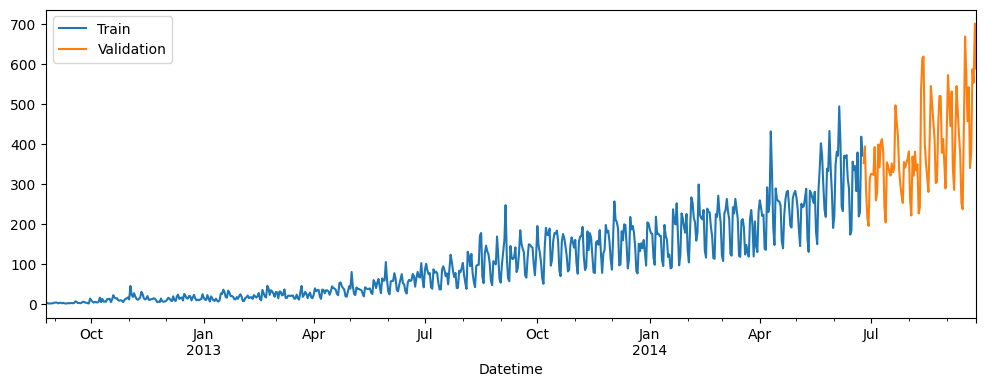

In [75]:
df_train.Count.plot(figsize=(12,4))
df_validation.Count.plot(figsize=(12,4))
plt.legend(['Train', 'Validation'])